In [1]:
import numpy as np

from matplotlib import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Mexican hat potential

$$
U(x, y) =(x^2 + y^2 - R^2)^2
$$

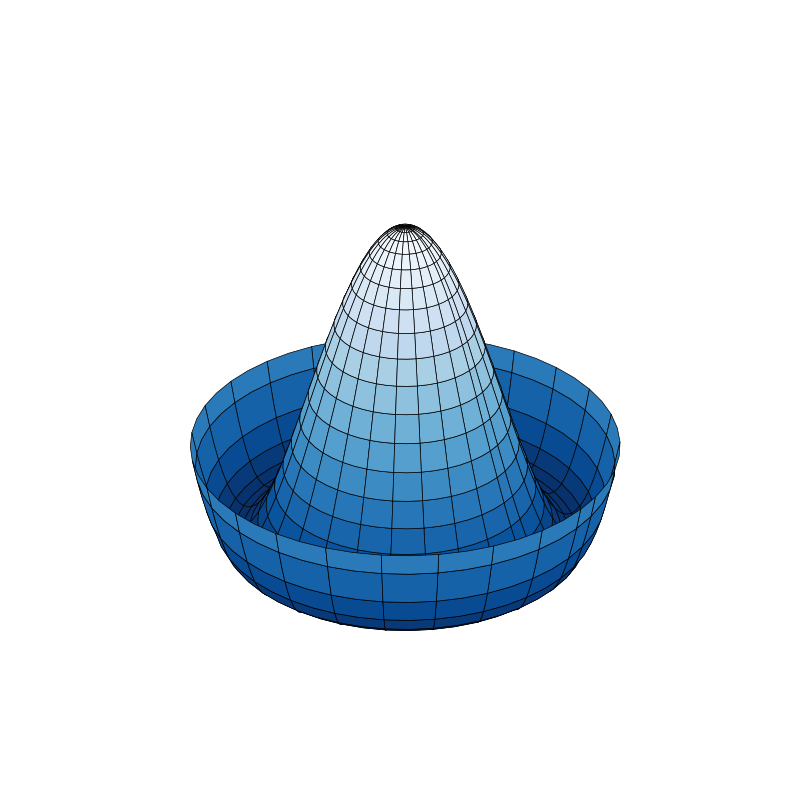

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, edgecolor='k', alpha=1, cmap=cm.Blues_r,  rstride=2, cstride=2, linewidth=0.5,)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.axis('off');

## Stable potential

$$
U(x, y) =(x^2 + y^2)
$$

(-6.9079916370113965, 6.907999601762448, -6.907981083721208, 6.907997013218261)

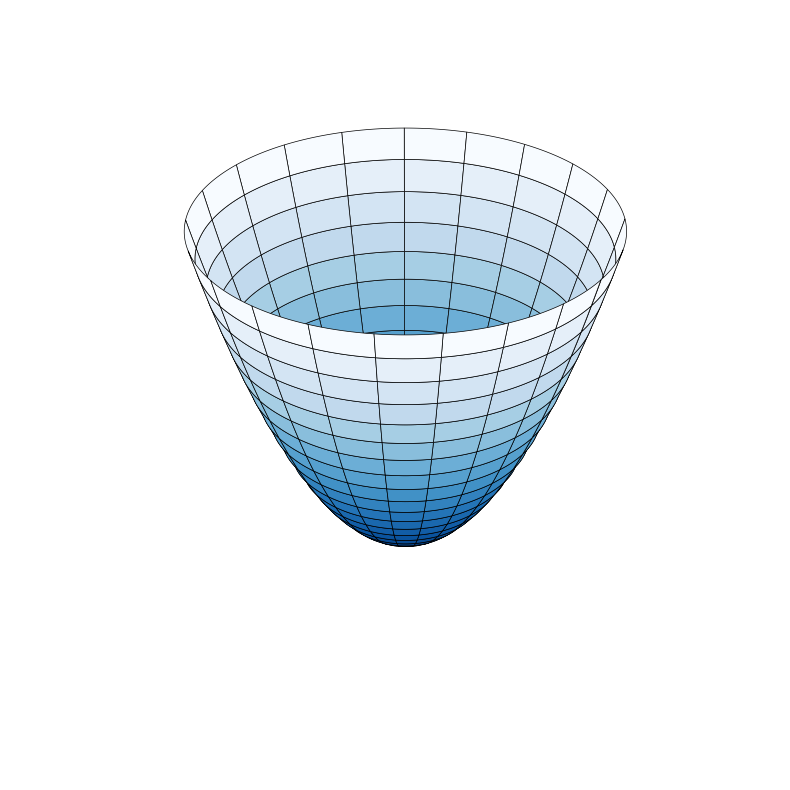

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

r = T = np.arange(0, 2*np.pi, 0.01)
r, T = np.meshgrid(r, T)
#Parametrise it
X = r*np.cos(T)
Y = r*np.sin(T)
Z = r**2

ax.plot_surface(X, Y, Z, edgecolor='k', alpha=1, cmap=cm.Blues_r,  rstride=30, cstride=30, linewidth=0.5,)

plt.axis('off')

## Unstable potential

$$
U(x, y) = - (x^2 + y^2)
$$

(-6.9079916370113965, 6.907999601762448, -6.907981083721208, 6.907997013218261)

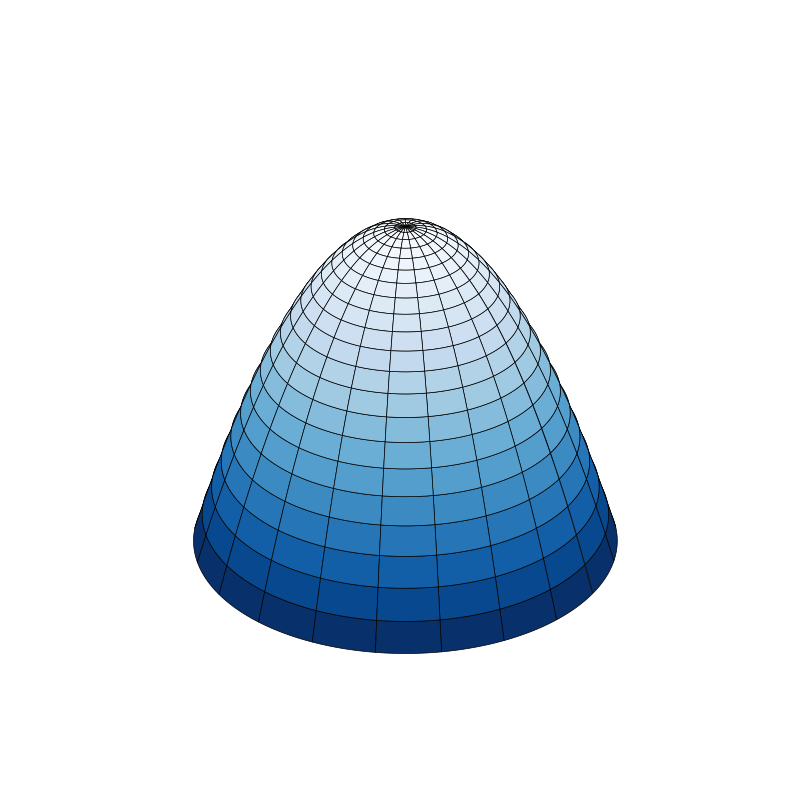

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

r = T = np.arange(0, 2*np.pi, 0.01)
r, T = np.meshgrid(r, T)
#Parametrise it
X = r*np.cos(T)
Y = r*np.sin(T)
Z = r**2

ax.plot_surface(X, Y, -Z, edgecolor='k', alpha=1, cmap=cm.Blues_r,  rstride=30, cstride=30, linewidth=0.5,)

plt.axis('off')

## Saddle potential

$$
U(x, y) =(x^2 - y^2)
$$

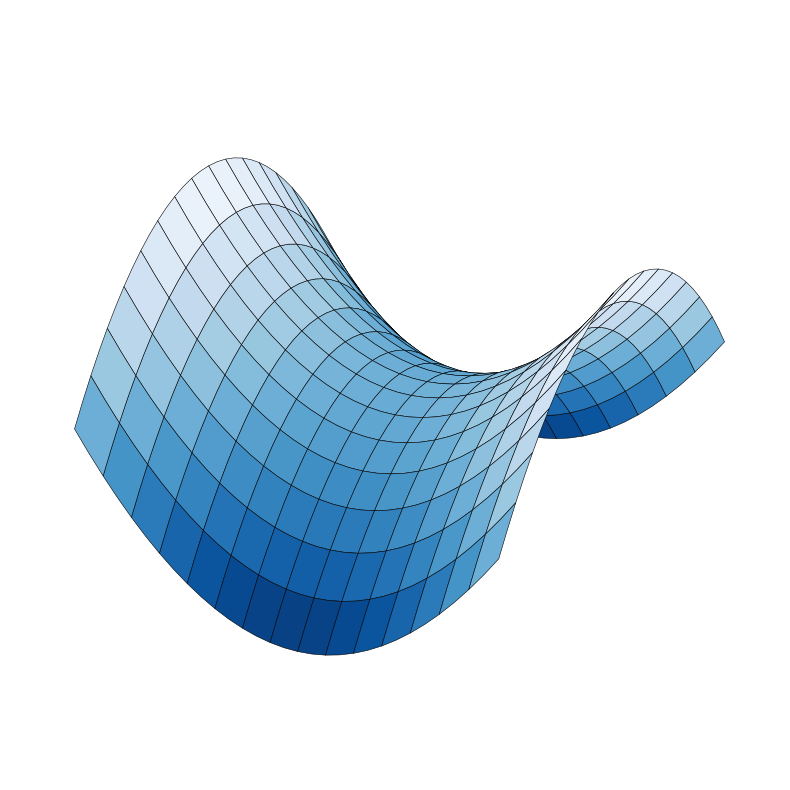

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plot_args = {'rstride': 2, 'cstride': 2, 'cmap':"Blues_r",
             'linewidth': 0.4, 'antialiased': True,
             'vmin': -1, 'vmax': 1, 'edgecolor':'k'}

x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2

ax.plot_surface(x, y, z, **plot_args)
ax.plot([0], [0], [0], 'ro')
ax.view_init(azim=-60, elev=30)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
 
plt.axis('off');

## Potential and gradient

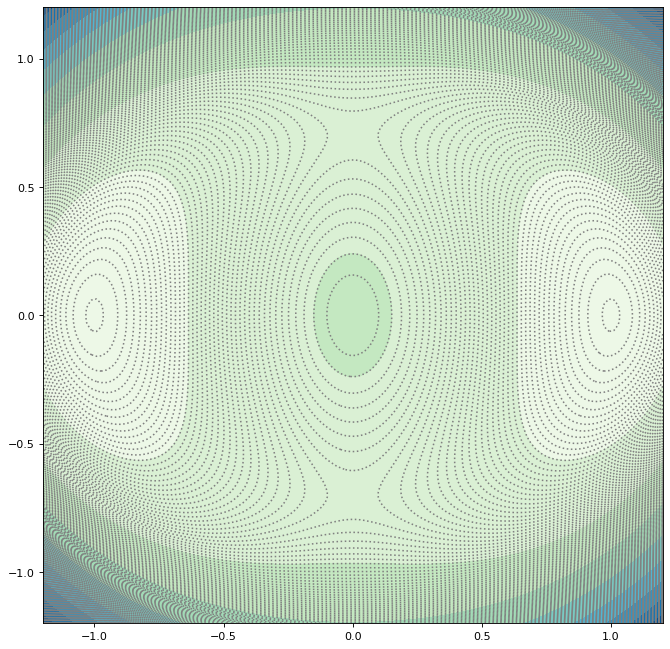

In [6]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

x1, x2 = -1.2, 1.2
y1, y2 = -1.2, 1.2

def system_potential(x, y):
    return (1-x**2 -y**2)**2 + 3.5*np.log(3+y**2) 


X, Y = np.meshgrid(np.linspace(x1, x2, 128), np.linspace(y1, y2, 128))
plt.contour(X, Y, system_potential(X, Y), 232, colors='grey', linewidths=1.4, linestyles='dotted')
plt.contourf(X,Y, system_potential(X, Y), 8,cmap=plt.cm.GnBu)#, norm=colors.PowerNorm(gamma=0.5))

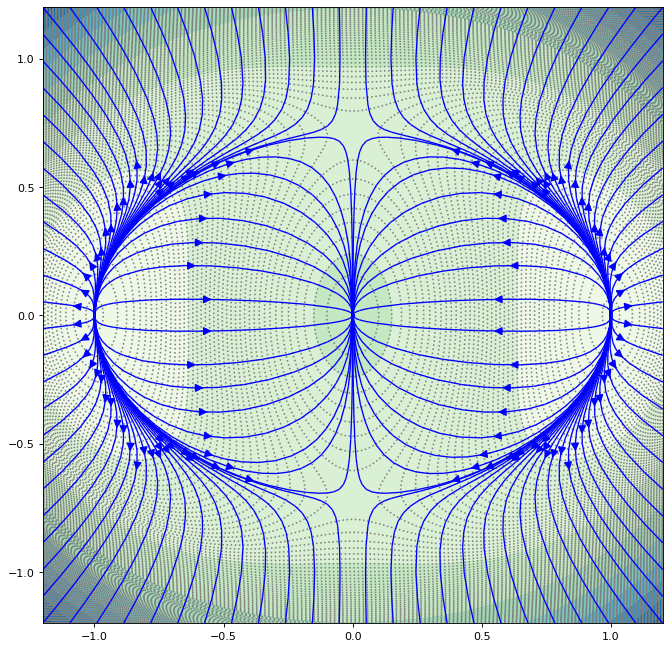

In [9]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

x1, x2 = -1.2, 1.2
y1, y2 = -1.2, 1.2

def vectorField(x, y):
    vx = 2*(1-x**2 -y**2)*(-2*x)
    vy = 2*(1-x**2 -y**2)*(-2*y) + 7*y/(3+y**2)
    return vx, vy



X, Y = np.meshgrid(np.linspace(x1, x2, 128), np.linspace(y1, y2, 128))
plt.contour(X, Y, system_potential(X, Y), 232, colors='grey', linewidths=1.4, linestyles='dotted')
plt.contourf(X,Y, system_potential(X, Y), 8,cmap=plt.cm.GnBu)#, norm=colors.PowerNorm(gamma=0.5))

sax, say= vectorField(X, Y)
plt.streamplot(X,Y, sax, say, density=.8, linewidth=1.2, color='blue', arrowsize=1.5, broken_streamlines=False);
